In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C:/Users/VICTUS/Desktop/PyhtonAdventure/Datasets/car_prices.csv")
df.tail(4)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


Proje Genel Bakış

Veri Kümesi Açıklaması

Boyut: 558,837 gözlem (veri noktası) bulunmaktadır.

-    Özellikler (toplam 16 adet):

Nicel Özellikler (Sayısal değerlere sahip özellikler)

-    year (int64): Araç üretim yılı.
-    condition (float64): Araç durumu (muhtemelen sayısal bir ölçekte).
-    odometer (float64): Araç kilometre bilgisi.
-    mmr (float64): Manheim Market Raporu değeri (tahmini piyasa değeri).
-    sellingprice (float64): Araç satış fiyatı.

Nitel Özellikler (Kategorik değerlere sahip özellikler)

-   make (object): Araç markası/üreticisi.
-    model (object): Araçın belirli modeli.
-    trim (object): Model içindeki ek spesifikasyon.
-    body (object): Araç gövde tipi (örneğin, Sedan, SUV, vb.).
-    transmission (object): Şanzıman tipi (örneğin, otomatik, manuel).
-    vin (object): Araçın benzersiz Araç Tanımlama Numarası (Vehicle Identification Number).
-    state (object): Araç kayıtlı olduğu eyalet.
-    color (object): Araç dış renk.
-    interior (object): Araç iç renk.
-    seller (object): Araç satan kuruluş.
-    saledate (object): Satışın tarihi ve saati.

Notlar

-    year ve saledate özellikleri, daha kolay analiz için datetime formatına dönüştürülmelidir.



In [2]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [3]:
df.shape

(558837, 16)

### Eksik verilerin incelenmesi

- 'transmission' için 65352 adet eksik veri gözlemledik, ilerleyen aşamalarda bu eksik verilerin dataset ile uyumlu dağılıp dağılmadığına bakıp ona göre eksik verileri doldurmaya çalışacağız gerekirse silinebilir.

- 'transmission' dışındaki değişkenlerdeki veriler sete göre küçük boyutlarda sayılırlar, yine sonraki işlemlerde karar vereceğiz.

In [4]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [5]:
df = df.sort_values("make").reset_index(drop=True ,)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2014,Acura,RDX,Base,SUV,NaN,5j8tb4h35el018580,pa,43.0,15636.0,black,black,r hollenshead auto sales inc,29100.0,30000.0,Fri Mar 06 2015 01:00:00 GMT-0800 (PST)
1,2012,Acura,TL,Base,Sedan,automatic,19uua8f2xca017975,nj,32.0,39205.0,gray,gray,ahfc/honda lease/trust/hvt inc. eot acuras,18300.0,17600.0,Wed Feb 25 2015 01:30:00 GMT-0800 (PST)
2,2012,Acura,TL,Base,Sedan,automatic,19uua8f21ca006489,ga,43.0,32016.0,black,tan,ahfc/honda lease/trust/hvt inc. eot acuras,18600.0,20400.0,Thu Feb 26 2015 02:00:00 GMT-0800 (PST)
3,2002,Acura,MDX,Base,suv,automatic,2hnyd18212h543448,wa,28.0,102011.0,red,gray,lexus of bellevue,3950.0,7750.0,Wed May 27 2015 06:20:00 GMT-0700 (PDT)
4,2012,Acura,TL,Technology Package,Sedan,NaN,19uua8f54ca036399,nj,29.0,40981.0,black,black,ahfc/honda lease/trust/hvt inc. eot acuras,20300.0,20400.0,Wed Feb 25 2015 01:30:00 GMT-0800 (PST)


### Satış Değeri (sellingprice) Görselleştirme

Satış değeri (sellingprice) değerlerini görselleştirdiğimizde özellikle boxplot grafiğine baktığımızda 'sellingprice' değişkeni için birçok aykırı değer bulunduğunu görüyoruz.

In [6]:
(df["transmission"]=="automatic").sum()

475915

<Axes: xlabel='sellingprice', ylabel='Count'>

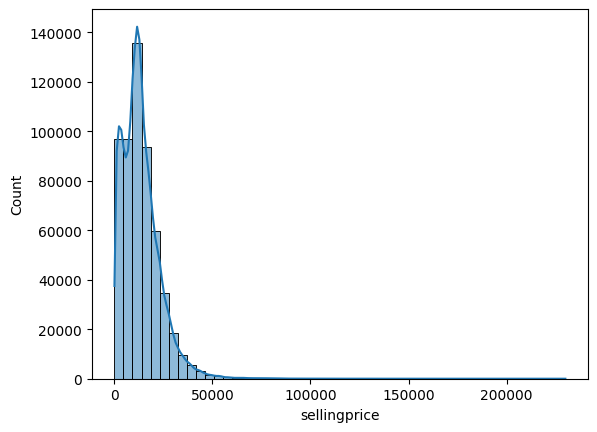

In [7]:
sns.histplot(df["sellingprice"],bins=50,kde=True)

<Axes: ylabel='sellingprice'>

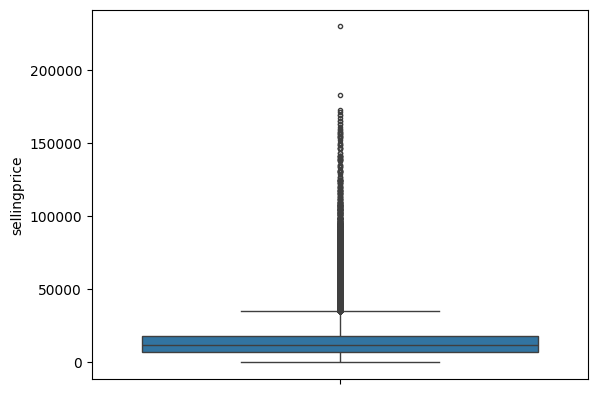

In [8]:
sns.boxplot(df["sellingprice"] , whis=1.5 , fliersize=3)

### Aykırı gözlemlerin silinmesi/filtrelenmesi

Yukarıdaki boxplot'a baktarak diyebiliriz ki, 30000-35000 üzerindeki veriler aykırı değerler olup 'sellingprice' sütunundan silinebilir veya filtreleme işlemi yapılabilir.

In [9]:
df = df.loc[df["sellingprice"]< 32500,:]
df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2014,Acura,RDX,Base,SUV,NaN,5j8tb4h35el018580,pa,43.0,15636.0,black,black,r hollenshead auto sales inc,29100.0,30000.0,Fri Mar 06 2015 01:00:00 GMT-0800 (PST)
1,2012,Acura,TL,Base,Sedan,automatic,19uua8f2xca017975,nj,32.0,39205.0,gray,gray,ahfc/honda lease/trust/hvt inc. eot acuras,18300.0,17600.0,Wed Feb 25 2015 01:30:00 GMT-0800 (PST)
2,2012,Acura,TL,Base,Sedan,automatic,19uua8f21ca006489,ga,43.0,32016.0,black,tan,ahfc/honda lease/trust/hvt inc. eot acuras,18600.0,20400.0,Thu Feb 26 2015 02:00:00 GMT-0800 (PST)


<Axes: ylabel='sellingprice'>

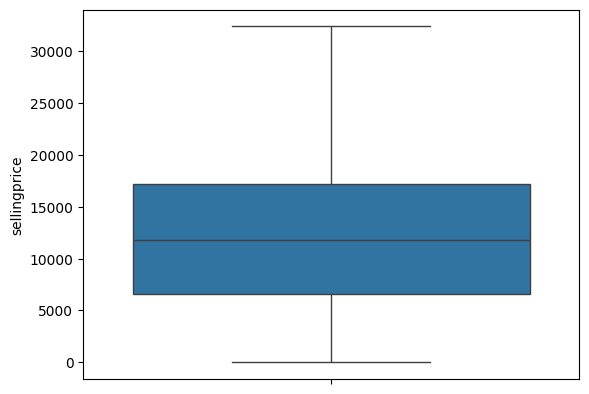

In [10]:
sns.boxplot(df["sellingprice"] , whis=1.5 , fliersize=3)

'transmission' null olduğu satırlardan 'transmission_null' tablosu oluşturduk

In [11]:
transmission_null = df[df["transmission"].isnull() == True]

### 'transmission_null'un incelenmesi

'transmission_null' u histplot üzerinden incelediğimizde, ana dataframe (df) ile çok benzer bir dağılımda olduğunu gözlemliyoruz.Burada null değerler ortalama veya mod değerleri ile doldurulabilir, fakat ben 'transmission' değerini bağımlı değişken olarak alıp, RFC veya KNN ile modeli eğitip eksik verileri bu şekilde doldurmak istiyorum, bu şekilde mod veya ortalama gibi tek bir değer üzerinden tüm hücrelere atama yapmak yerine dağılımı koruyarak atama işlemi yapmış olacağım. Bu da araç fiyat tahmin uygulaması için daha verimli olacak (öyle umuyorum :DD)

Text(0, 0.5, 'count')

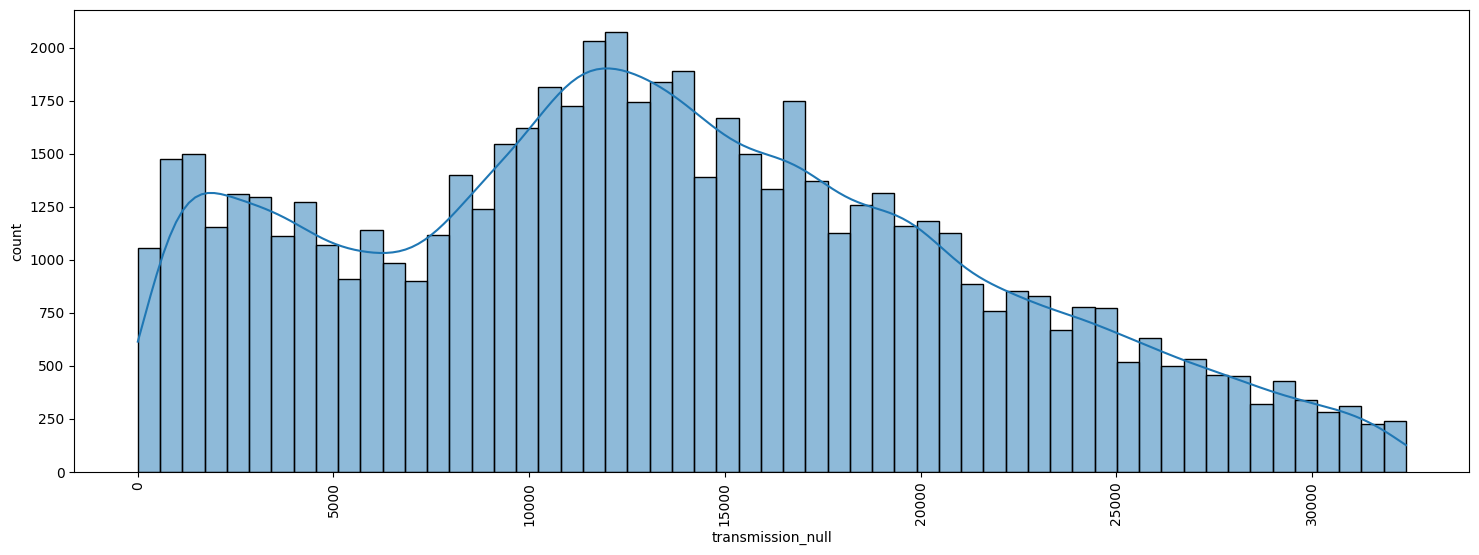

In [12]:
plt.figure(figsize=(18,6))
sns.histplot(transmission_null["sellingprice"] , kde=True)
plt.xticks(rotation=90)
plt.xlabel("transmission_null")
plt.ylabel("count")

Text(0, 0.5, 'count')

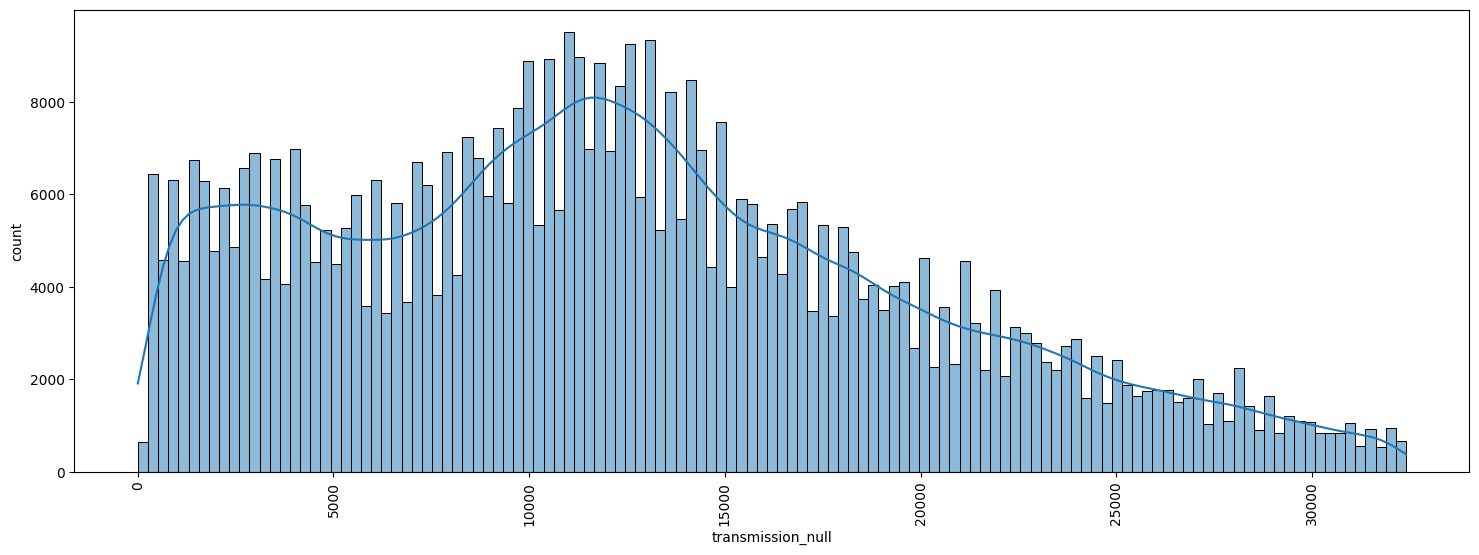

In [13]:
plt.figure(figsize=(18,6))
sns.histplot(df["sellingprice"] , kde=True)
plt.xticks(rotation=90)
plt.xlabel("transmission_null")
plt.ylabel("count")

In [14]:
df["transmission"].unique()

array([nan, 'automatic', 'manual', 'sedan', 'Sedan'], dtype=object)

In [15]:
sedan = (df["transmission"] == 'sedan').sum()
Sedan = (df["transmission"] == 'Sedan').sum()
auto = (df["transmission"] == 'automatic').sum()

print(sedan,Sedan,auto)

15 11 457115


In [16]:
sedan = df[(df["transmission"] == 'sedan')]
sedan.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
529674,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj7fm218440,NaN,42.0,20627,white,black,NaN,13600.0,13500
529688,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,NaN,3vwd17aj7fm222388,NaN,36.0,20379,silver,black,NaN,13600.0,13500
530562,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm268964,NaN,2.0,9887,red,black,NaN,13900.0,9900
532142,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj2fm261566,NaN,48.0,5001,blue,gray,NaN,13400.0,13600
532169,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm206111,NaN,2.0,6864,gray,black,NaN,14000.0,9800


In [17]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

### Droplama işlemleri

'vin' sütununun veri seti ve eğitilecek modelle bir ilgisi olmadığı için sildik.

In [18]:
df.drop(["vin"],axis=1,inplace=True)
df.reset_index(drop=True , inplace=True)
df.head(2)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2014,Acura,RDX,Base,SUV,NaN,pa,43.0,15636.0,black,black,r hollenshead auto sales inc,29100.0,30000.0,Fri Mar 06 2015 01:00:00 GMT-0800 (PST)
1,2012,Acura,TL,Base,Sedan,automatic,nj,32.0,39205.0,gray,gray,ahfc/honda lease/trust/hvt inc. eot acuras,18300.0,17600.0,Wed Feb 25 2015 01:30:00 GMT-0800 (PST)


In [19]:
df = df[df["transmission"] != ('sedan','Sedan')].reset_index(drop=True)
df['transmission'].unique()

array([nan, 'automatic', 'manual', 'sedan', 'Sedan'], dtype=object)

In [20]:
df.drop(["seller","saledate"],axis=1,inplace=True)
df.reset_index(drop=True)
df.head(2)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2014,Acura,RDX,Base,SUV,NaN,pa,43.0,15636.0,black,black,29100.0,30000.0
1,2012,Acura,TL,Base,Sedan,automatic,nj,32.0,39205.0,gray,gray,18300.0,17600.0


In [21]:
df.isnull().sum()

year                0
make             9842
model            9854
trim            10192
body            12678
transmission    62146
state               0
condition       11736
odometer           93
color             579
interior          579
mmr                26
sellingprice        0
dtype: int64

### 'df_temp' adında ana dataframe üzerinden bir kopya oluşturuldu

In [22]:
df_temp = df.copy()

In [23]:
df_temp.head(2)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2014,Acura,RDX,Base,SUV,NaN,pa,43.0,15636.0,black,black,29100.0,30000.0
1,2012,Acura,TL,Base,Sedan,automatic,nj,32.0,39205.0,gray,gray,18300.0,17600.0


In [24]:
numerical_variables = ["year","condition","odometer","mmr","sellingprice"]

<Axes: xlabel='year', ylabel='Count'>

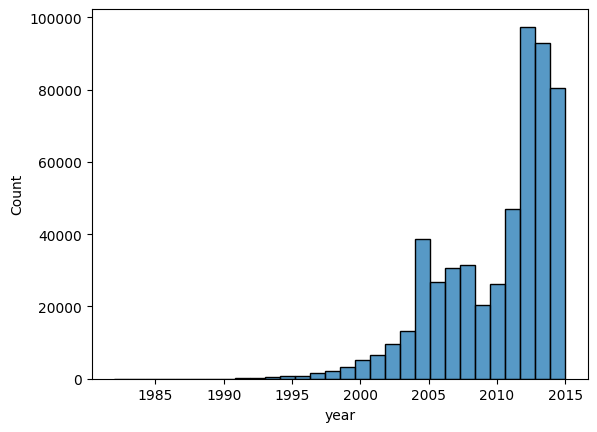

In [25]:
sns.histplot(df_temp["year"],bins=30)

<Axes: ylabel='year'>

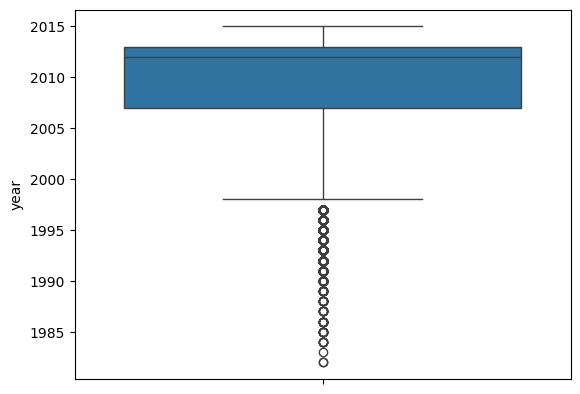

In [26]:
sns.boxplot(df_temp["year"])

<Axes: ylabel='year'>

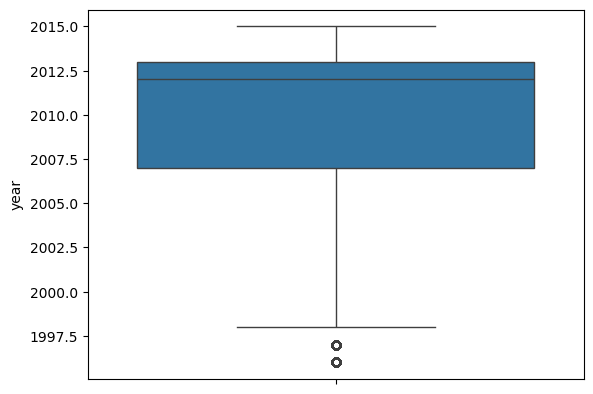

In [27]:
df_temp = df_temp.loc[df_temp["year"]> 1995,:]
sns.boxplot(df_temp["year"])

<Axes: xlabel='year', ylabel='sellingprice'>

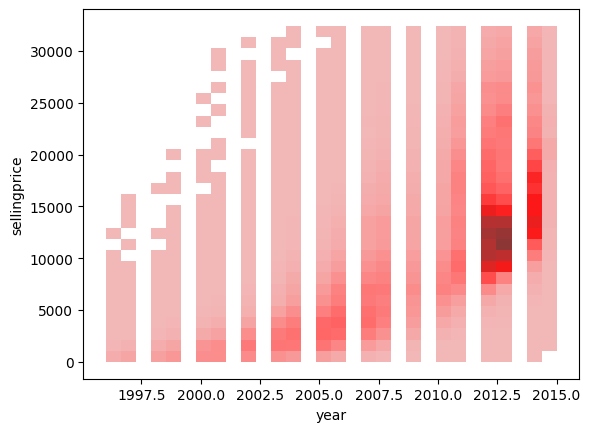

In [28]:
sns.histplot(x=df_temp["year"],y=df_temp["sellingprice"],bins=30,color='red')

<Axes: xlabel='condition', ylabel='Count'>

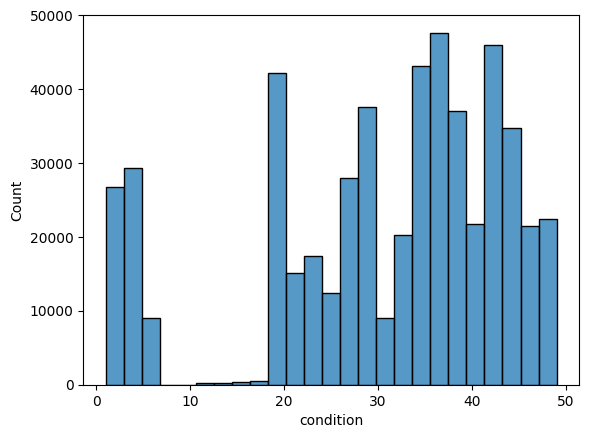

In [29]:
sns.histplot(df_temp["condition"],bins=25)

<Axes: ylabel='condition'>

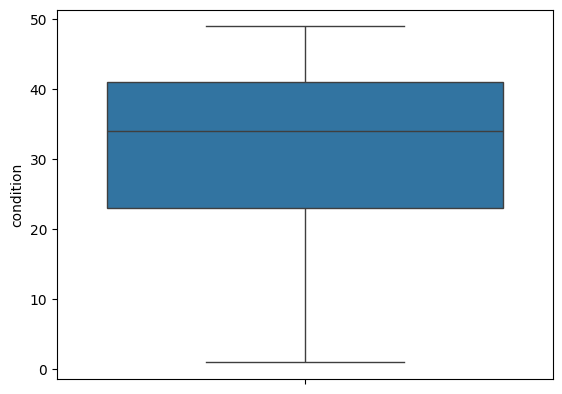

In [30]:
sns.boxplot(df_temp["condition"])

<Axes: xlabel='condition', ylabel='sellingprice'>

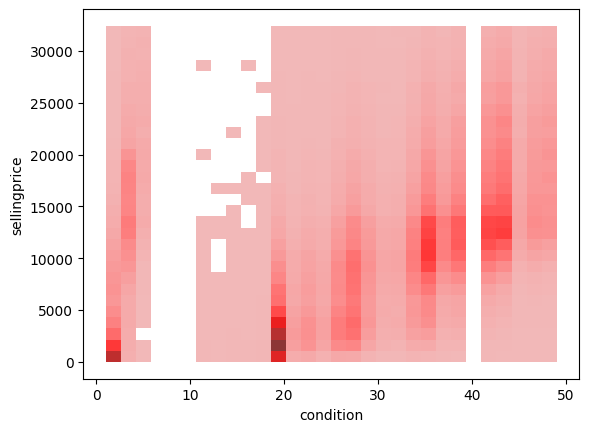

In [31]:
sns.histplot(x=df_temp["condition"],y=df_temp["sellingprice"],bins=30,color='red')

In [32]:
df_temp["odometer"].max()

999999.0

Text(0, 0.5, 'count')

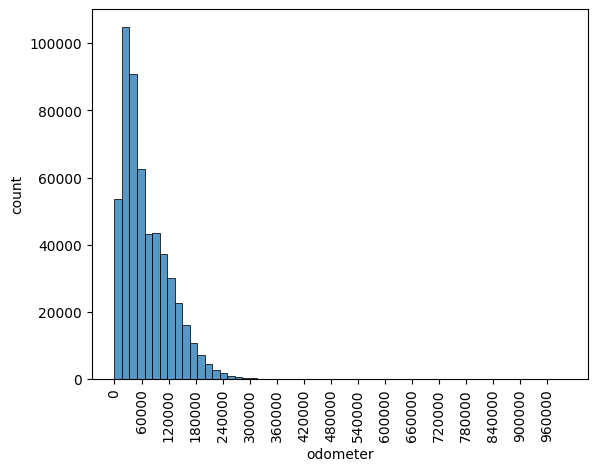

In [33]:
sns.histplot(df_temp["odometer"],bins=60)
plt.xticks(range(0,int(df_temp["odometer"].max()),60000),rotation = 90)
plt.xlabel("odometer")
plt.ylabel("count")

Text(0, 0.5, 'odometer')

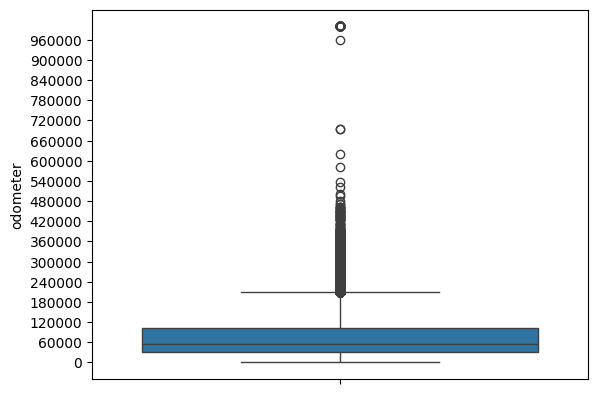

In [34]:
sns.boxplot(df_temp["odometer"])
plt.yticks(range(0,int(df_temp["odometer"].max()),60000))
plt.ylabel("odometer")

Text(0, 0.5, 'odometer')

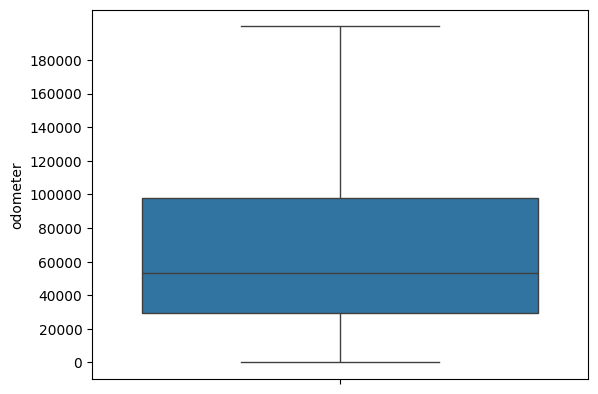

In [35]:
df_temp = df_temp.loc[df_temp["odometer"] < 200000,:]
sns.boxplot(df_temp["odometer"])
plt.yticks(range(0,int(df_temp["odometer"].max()),20000))
plt.ylabel("odometer")

<Axes: xlabel='odometer', ylabel='sellingprice'>

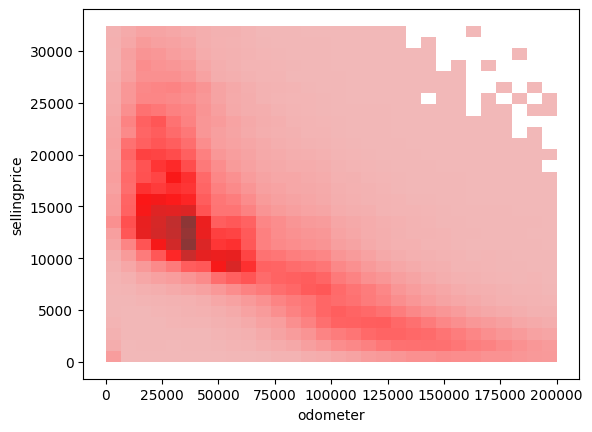

In [36]:
sns.histplot(x=df_temp["odometer"],y=df_temp["sellingprice"],bins=30,color='red')

In [37]:
df_temp.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'mmr', 'sellingprice'],
      dtype='object')

In [38]:
df_temp.describe()

,year,condition,odometer,mmr,sellingprice
count,522789.000000,512085.000000,522789.000000,522763.000000,522789.000000
mean,2010.117958,30.762707,66084.631228,12837.146565,12652.066155
std,3.757611,13.155864,46305.742603,7330.111739,7378.238585
min,1996.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,29221.000000,7300.000000,7000.000000
50%,2012.000000,35.000000,52986.000000,12100.000000,12000.000000
75%,2013.000000,41.000000,97614.000000,17500.000000,17400.000000
max,2015.000000,49.000000,199999.000000,110000.000000,32401.000000


In [39]:
df_temp.isnull().sum()

year                0
make             8942
model            8954
trim             9258
body            11468
transmission    60144
state               0
condition       10704
odometer            0
color             549
interior          549
mmr                26
sellingprice        0
dtype: int64

In [40]:
df_temp_2 = df_temp.copy()

In [41]:
df_temp_2.dropna(axis=0,inplace=True)
df_temp_2.reset_index(drop=True,inplace=True)
df_temp_2.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
dtype: int64

In [42]:
df_temp_2.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2012,Acura,TL,Base,Sedan,automatic,nj,32.0,39205.0,gray,gray,18300.0,17600.0
1,2012,Acura,TL,Base,Sedan,automatic,ga,43.0,32016.0,black,tan,18600.0,20400.0
2,2002,Acura,MDX,Base,suv,automatic,wa,28.0,102011.0,red,gray,3950.0,7750.0
3,2007,Acura,MDX,Base,suv,automatic,sc,2.0,86427.0,black,gray,13300.0,14500.0
4,2007,Acura,MDX,Base,suv,automatic,ms,4.0,84041.0,white,brown,13550.0,15000.0


In [43]:
df_temp_2.nunique()

year                20
make                46
model              696
trim              1366
body                81
transmission         2
state               34
condition           41
odometer        151079
color               20
interior            17
mmr                831
sellingprice      1081
dtype: int64

In [44]:
df_temp_2.shape

(444008, 13)

In [45]:
df_temp_2.drop("mmr",axis=1,inplace=True)

In [46]:
df_temp_2.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
sellingprice    float64
dtype: object

In [47]:
categorical_variables = ["make","body","model","trim","state","color","interior"]

In [48]:
df_temp_2.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
0,2012,Acura,TL,Base,Sedan,automatic,nj,32.0,39205.0,gray,gray,17600.0
1,2012,Acura,TL,Base,Sedan,automatic,ga,43.0,32016.0,black,tan,20400.0
2,2002,Acura,MDX,Base,suv,automatic,wa,28.0,102011.0,red,gray,7750.0
3,2007,Acura,MDX,Base,suv,automatic,sc,2.0,86427.0,black,gray,14500.0
4,2007,Acura,MDX,Base,suv,automatic,ms,4.0,84041.0,white,brown,15000.0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

encoder = LabelEncoder()
for variable in categorical_variables:
    df_temp_2[variable] = encoder.fit_transform(df_temp_2[variable])

In [50]:
df_temp_2.head(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
0,2012,0,586,348,34,automatic,18,32.0,39205.0,7,6,17600.0
1,2012,0,586,348,34,automatic,5,43.0,32016.0,1,13,20400.0
2,2002,0,364,348,75,automatic,32,28.0,102011.0,14,6,7750.0


In [51]:
df["transmission"].unique()

array([nan, 'automatic', 'manual', 'sedan', 'Sedan'], dtype=object)

In [52]:
transmission_tonumeric = {"manual":0,"automatic":1}
df_temp_2["transmission"] = df_temp_2["transmission"].map(transmission_tonumeric)

In [53]:
df_temp_2["transmission"] == "manuel"

0         False
1         False
2         False
3         False
4         False
          ...  
444003    False
444004    False
444005    False
444006    False
444007    False
Name: transmission, Length: 444008, dtype: bool

In [54]:
X = df_temp_2.drop(["transmission"],axis=1)
y = df_temp_2.loc[:,["transmission"]].values

In [55]:
X.shape

(444008, 11)

In [56]:
y.shape

(444008, 1)

In [57]:
X.head()

,year,make,model,trim,body,state,condition,odometer,color,interior,sellingprice
0,2012,0,586,348,34,18,32.0,39205.0,7,6,17600.0
1,2012,0,586,348,34,5,43.0,32016.0,1,13,20400.0
2,2002,0,364,348,75,32,28.0,102011.0,14,6,7750.0
3,2007,0,364,348,75,27,2.0,86427.0,1,6,14500.0
4,2007,0,364,348,75,15,4.0,84041.0,17,3,15000.0


In [58]:
df_temp_2.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
sellingprice    0
dtype: int64

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=33)

In [60]:
ss = StandardScaler()
X_train1 = ss.fit_transform(X_train)
X_test1 = ss.transform(X_test)

In [61]:
pd.DataFrame(X_train1).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.202370,-0.283904,-0.849878,0.109839,0.592356,-1.225058,0.319028,0.124291,1.441137,0.521097,-0.455446
1,0.476461,1.885444,0.895159,-1.036960,-0.248373,-0.265639,-0.216380,-0.288356,-0.970366,-0.950793,0.147151
2,0.476461,-0.283904,-1.362813,0.693349,2.093657,0.310012,0.472001,0.215873,-0.367490,-0.705478,-0.263711
3,-0.619903,-0.605289,-0.379247,-0.057704,-0.068217,-0.265639,0.624975,1.825440,0.838261,0.521097,-0.606096
4,-0.893994,0.117827,-0.828726,1.074652,-0.248373,-0.937232,-2.205038,1.491663,-1.121085,0.521097,-1.373038


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train1, y_train)


c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [63]:
y_pred = knn.predict(X_test1)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc = accuracy_score(y_test,y_pred)
acc

0.9647455387641419

In [65]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[   438,   4124],
       [   572, 128069]], dtype=int64)

In [66]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.43      0.10      0.16      4562
           1       0.97      1.00      0.98    128641

    accuracy                           0.96    133203
   macro avg       0.70      0.55      0.57    133203
weighted avg       0.95      0.96      0.95    133203



In [67]:
y_test = pd.DataFrame(y_test)
a = y_test[y_test[0] == "automatic"]
a.count()

0    0
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=12,random_state=33)
rf.fit(X_train1,y_train)

c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=60, random_state=33)

In [69]:
y_pred2 = rf.predict(X_test1)

In [70]:
acc2 = accuracy_score(y_test,y_pred2)
acc2

0.9685217299910662

In [71]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[   814,   3748],
       [   445, 128196]], dtype=int64)

In [72]:
X_train1.shape

(310805, 11)

In [73]:
import tensorflow as tf
import keras

model = keras.models.Sequential()
model.add(keras.Input(shape=(11,)))
model.add(keras.layers.Dense(6,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# This builds the model for the first time:
model.fit(X_train1, y_train, epochs=5)


Epoch 1/5
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 5s 427us/step - accuracy: 0.9403 - loss: 0.2104
Epoch 2/5
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 4s 420us/step - accuracy: 0.9657 - loss: 0.1367
Epoch 3/5
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 4s 400us/step - accuracy: 0.9657 - loss: 0.1344
Epoch 4/5
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 4s 439us/step - accuracy: 0.9656 - loss: 0.1338
Epoch 5/5
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 4s 418us/step - accuracy: 0.9659 - loss: 0.1321


In [74]:
y_pred3 = model.predict(X_test1)

4163/4163 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step


In [75]:
y_pred3 = (y_pred3>0.5)

In [76]:
model.evaluate(X_test1,y_test)

4163/4163 ━━━━━━━━━━━━━━━━━━━━ 2s 346us/step - accuracy: 0.9667 - loss: 0.1303


[0.132595032453537, 0.9657515287399292]

In [77]:
cm = confusion_matrix(y_test,y_pred3)
cm

array([[     1,   4561],
       [     1, 128640]], dtype=int64)